In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
import pandas as pd
import numpy as np
from prnn.utils.predictiveNet import PredictiveNet
from prnn.utils.agent import RatInABoxAgent, RandomActionAgent
import itertools
import torch
import random
from prnn.utils.env import make_env
from prnn.utils.general import saveFig
from prnn.utils.figures import TrainingFigure
import matplotlib.pyplot as plt
from prnn.analysis.SpatialTuningAnalysis import SpatialTuningAnalysis
from prnn.analysis.OfflineTrajectoryAnalysis import OfflineTrajectoryAnalysis
from prnn.analysis.OfflineActivityAnalysis import SpontaneousActivityAnalysis
from prnn.analysis.representationalGeometryAnalysis import representationalGeometryAnalysis

/home/mila/a/aleksei.efremov/venvs/PredictiveReplay_39/lib/python3.9/site-packages/gymnasium/envs/registration.py:694: UserWarning: WARN: Overriding environment MiniGrid-BlockedUnlockPickup-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/home/mila/a/aleksei.efremov/venvs/PredictiveReplay_39/lib/python3.9/site-packages/gymnasium/envs/registration.py:694: UserWarning: WARN: Overriding environment MiniGrid-LavaCrossingS9N1-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/home/mila/a/aleksei.efremov/venvs/PredictiveReplay_39/lib/python3.9/site-packages/gymnasium/envs/registration.py:694: UserWarning: WARN: Overriding environment MiniGrid-LavaCrossingS9N2-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
/home/mila/a/aleksei.efremov/venvs/PredictiveReplay_39/lib/python3.9/site-packages/gymnasium/envs/registration.py:694: UserWarning: WARN

In [2]:
savefolder = 'Figures/RiaB/'

In [ ]:
# NextStep Visual
netname = 'AutoencoderPred_LN-ContSpeedOnehotHD-s8'
netfolder = 'example_net_RiaB_batch2/'
predictiveNet = PredictiveNet.loadNet(netfolder+netname)
env = predictiveNet.EnvLibrary[0]
env.n_obs = 1
agent = RatInABoxAgent('Vis')

Net Loaded from pathname


In [ ]:
# k=1 Visual
netname = 'thRNN_1win-ContSpeedOnehotHD-s8'
netfolder = 'example_net_RiaB_batch2/'
predictiveNet = PredictiveNet.loadNet(netfolder+netname)
env = predictiveNet.EnvLibrary[0]
env.n_obs = 1
agent = RatInABoxAgent('Vis')

Net Loaded from pathname


In [ ]:
# k=5 Visual
netname = 'thRNN_5win-ContSpeedOnehotHD-s8'
netfolder = 'example_net_RiaB_batch2/'
predictiveNet = PredictiveNet.loadNet(netfolder+netname)
env = predictiveNet.EnvLibrary[0]
env.n_obs = 1
agent = RatInABoxAgent('Vis')

Net Loaded from pathname


In [ ]:
# Sparse Visual
netname = 'lognRNN_mask-ContSpeedOnehotHD-s8'
netfolder = 'example_net_RiaB_batch2/'
predictiveNet = PredictiveNet.loadNet(netfolder+netname)
env = predictiveNet.EnvLibrary[0]
env.n_obs = 1
agent = RatInABoxAgent('Vis')

Net Loaded from pathname


In [ ]:
# NextStep Grid
netname = 'AutoencoderPred_LN-ContSpeedOnehotHD-s8'
netfolder = 'example_net_RiaB_grid_batch2/'
predictiveNet = PredictiveNet.loadNet(netfolder+netname)
env = predictiveNet.EnvLibrary[0]
env.n_obs = 1
agent = RatInABoxAgent('Vis')

Net Loaded from pathname


In [9]:
# k=1 Grid
netname = 'thRNN_1win-ContSpeedOnehotHD-s8'
netfolder = 'example_net_RiaB_grid_batch2/'
predictiveNet = PredictiveNet.loadNet(netfolder+netname)
env = predictiveNet.EnvLibrary[0]
env.n_obs = 1
agent = RatInABoxAgent('Vis')

Net Loaded from pathname


In [3]:
# k=5 Grid
netname = 'thRNN_5win-ContSpeedOnehotHD-s8'
netfolder = 'example_net_RiaB_grid_batch2/'
predictiveNet = PredictiveNet.loadNet(netfolder+netname)
env = predictiveNet.EnvLibrary[0]
env.n_obs = 1
agent = RatInABoxAgent('Vis')

Net Loaded from pathname


In [ ]:
# Sparse Grid
netname = 'lognRNN_mask-ContSpeedOnehotHD-s8'
netfolder = 'example_net_RiaB_grid_batch2/'
predictiveNet = PredictiveNet.loadNet(netfolder+netname)
env = predictiveNet.EnvLibrary[0]
env.n_obs = 1
agent = RatInABoxAgent('Vis')

Net Loaded from pathname


In [12]:
# k=5 Grid -> Visual
netname = 'multRNN_5win_i1_o0-ContSpeedOnehotHD-s8'
netfolder = 'example_net_RiaB_vision_grid_batch2/'
predictiveNet = PredictiveNet.loadNet(netfolder+netname)
env = predictiveNet.EnvLibrary[0]
agent = RatInABoxAgent('GridVis')

Net Loaded from pathname


In [15]:
# k=5 Visual -> Grid
netname = 'multRNN_5win_i0_o1-ContSpeedOnehotHD-s8'
netfolder = 'example_net_RiaB_vision_grid_batch2/'
predictiveNet = PredictiveNet.loadNet(netfolder+netname)
env = predictiveNet.EnvLibrary[0]
agent = RatInABoxAgent('VisGrid')

Net Loaded from pathname


In [10]:
STA = SpatialTuningAnalysis(predictiveNet, 
                            # timesteps_wake=20000,
                            inputControl=True,
                            untrainedControl=False,
                            agent=agent,
                            # start_pos=1,
                            fig_type='pdf'
                            )

Getting Tuning Curves for Input Units
Running WAKE
Calculating EV_s
Calculating EV_s for input control


## Visual

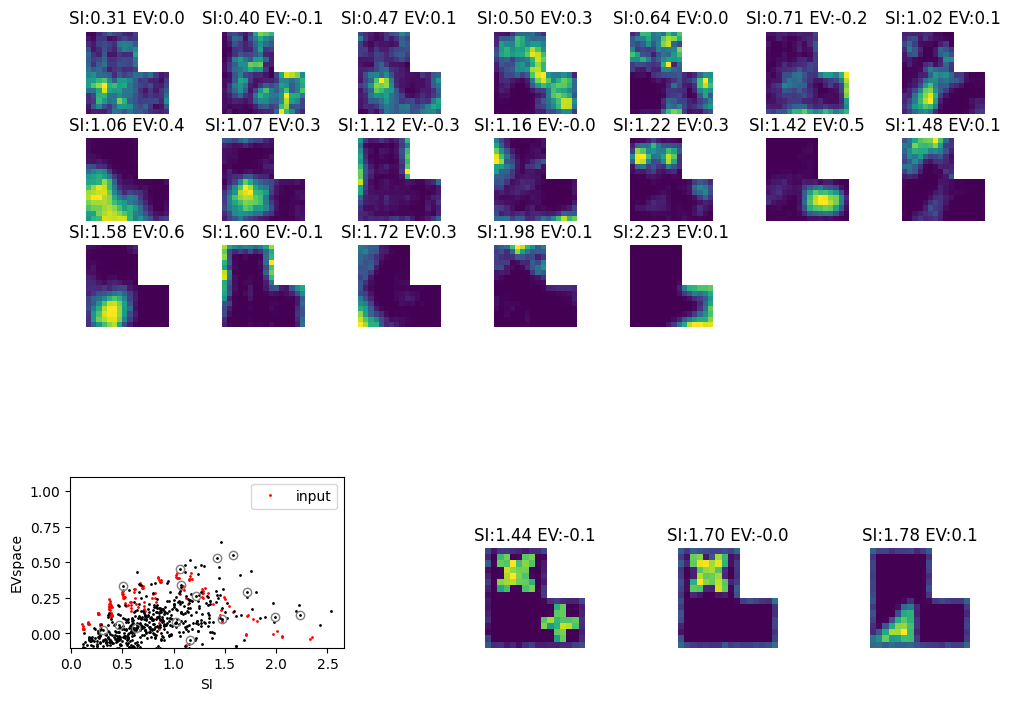

In [ ]:
# NextStep Visual
STA.SpatialTuningFigure(netname=netname,savefolder=savefolder,
                       exgrid=5)

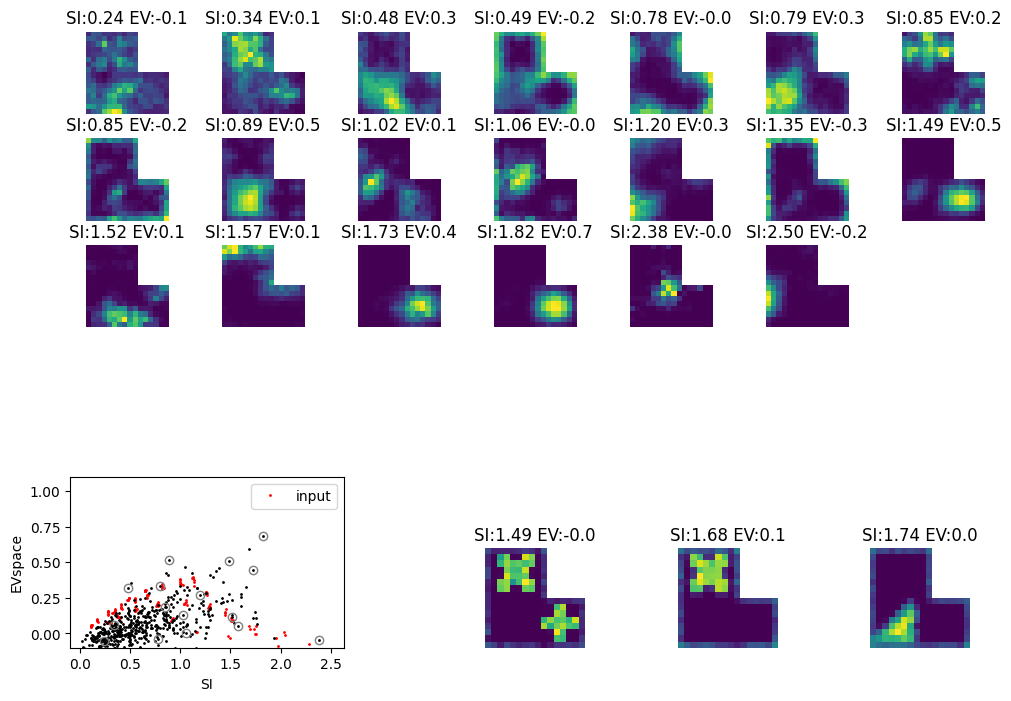

In [ ]:
# k=1 Visual
STA.SpatialTuningFigure(netname=netname,savefolder=savefolder,
                       exgrid=5)

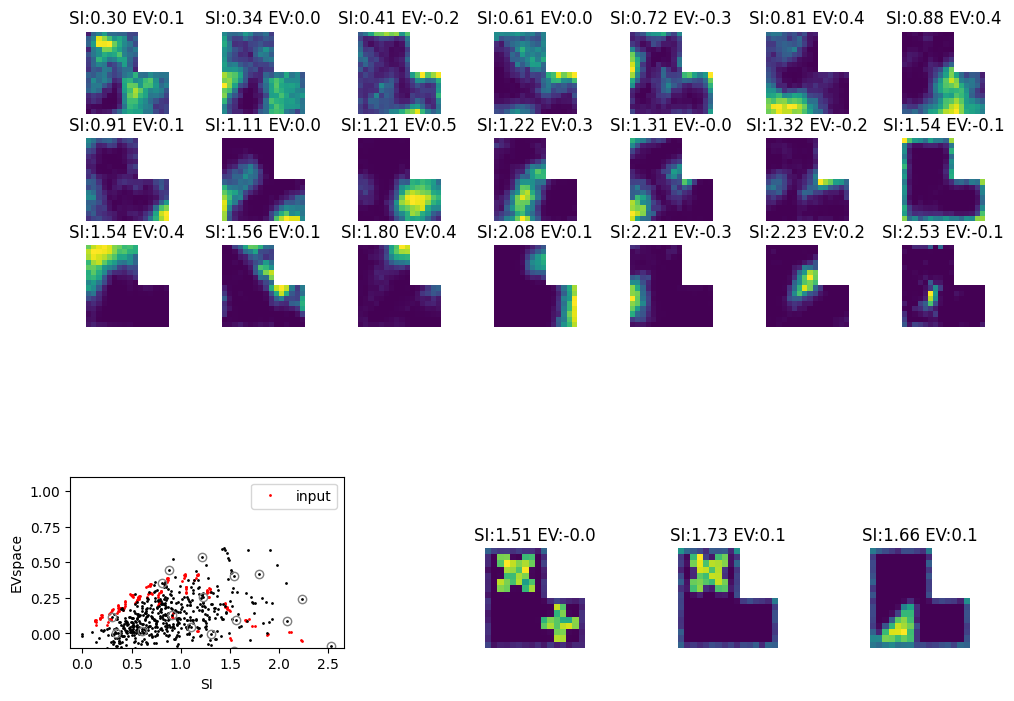

In [25]:
# k=5 Visual
STA.SpatialTuningFigure(netname=netname,savefolder=savefolder,
                       exgrid=5)

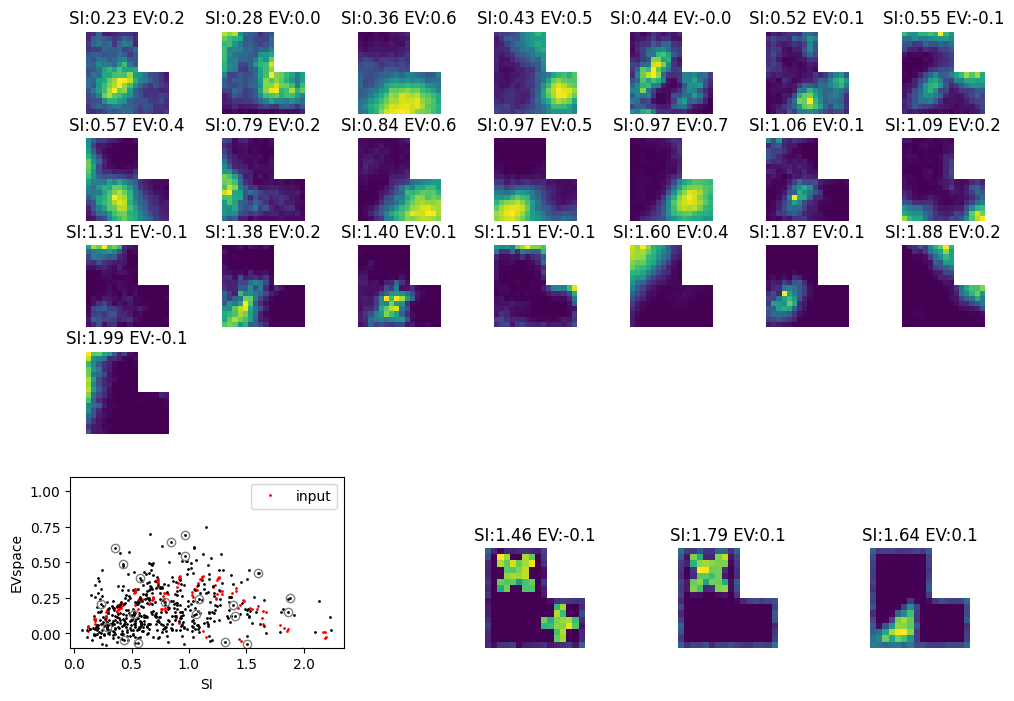

In [32]:
# Sparse Visual
STA.SpatialTuningFigure(netname=netname,savefolder=savefolder,
                       exgrid=5)

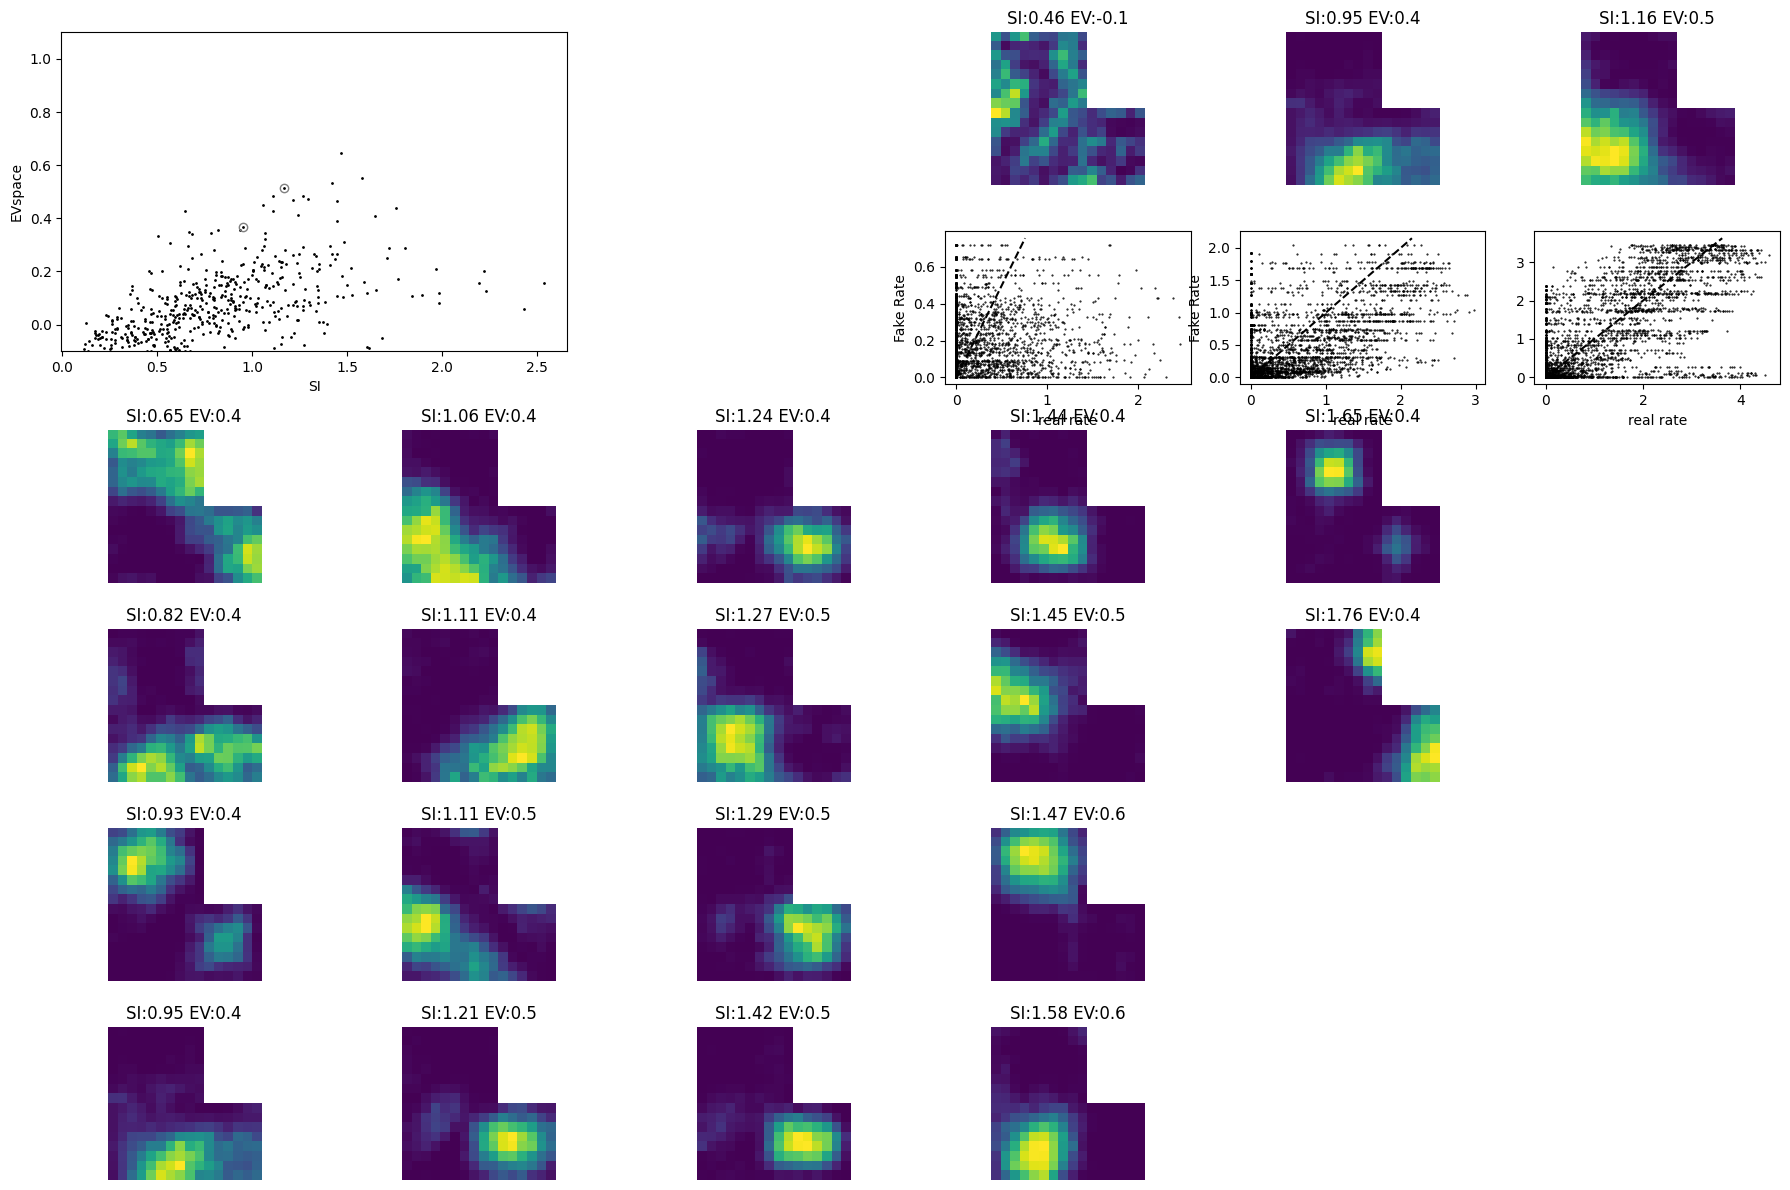

In [ ]:
# NextStep Visual
STA.TCReliabilityFigure(netname,savefolder,
                        threshold=0.35
                        )

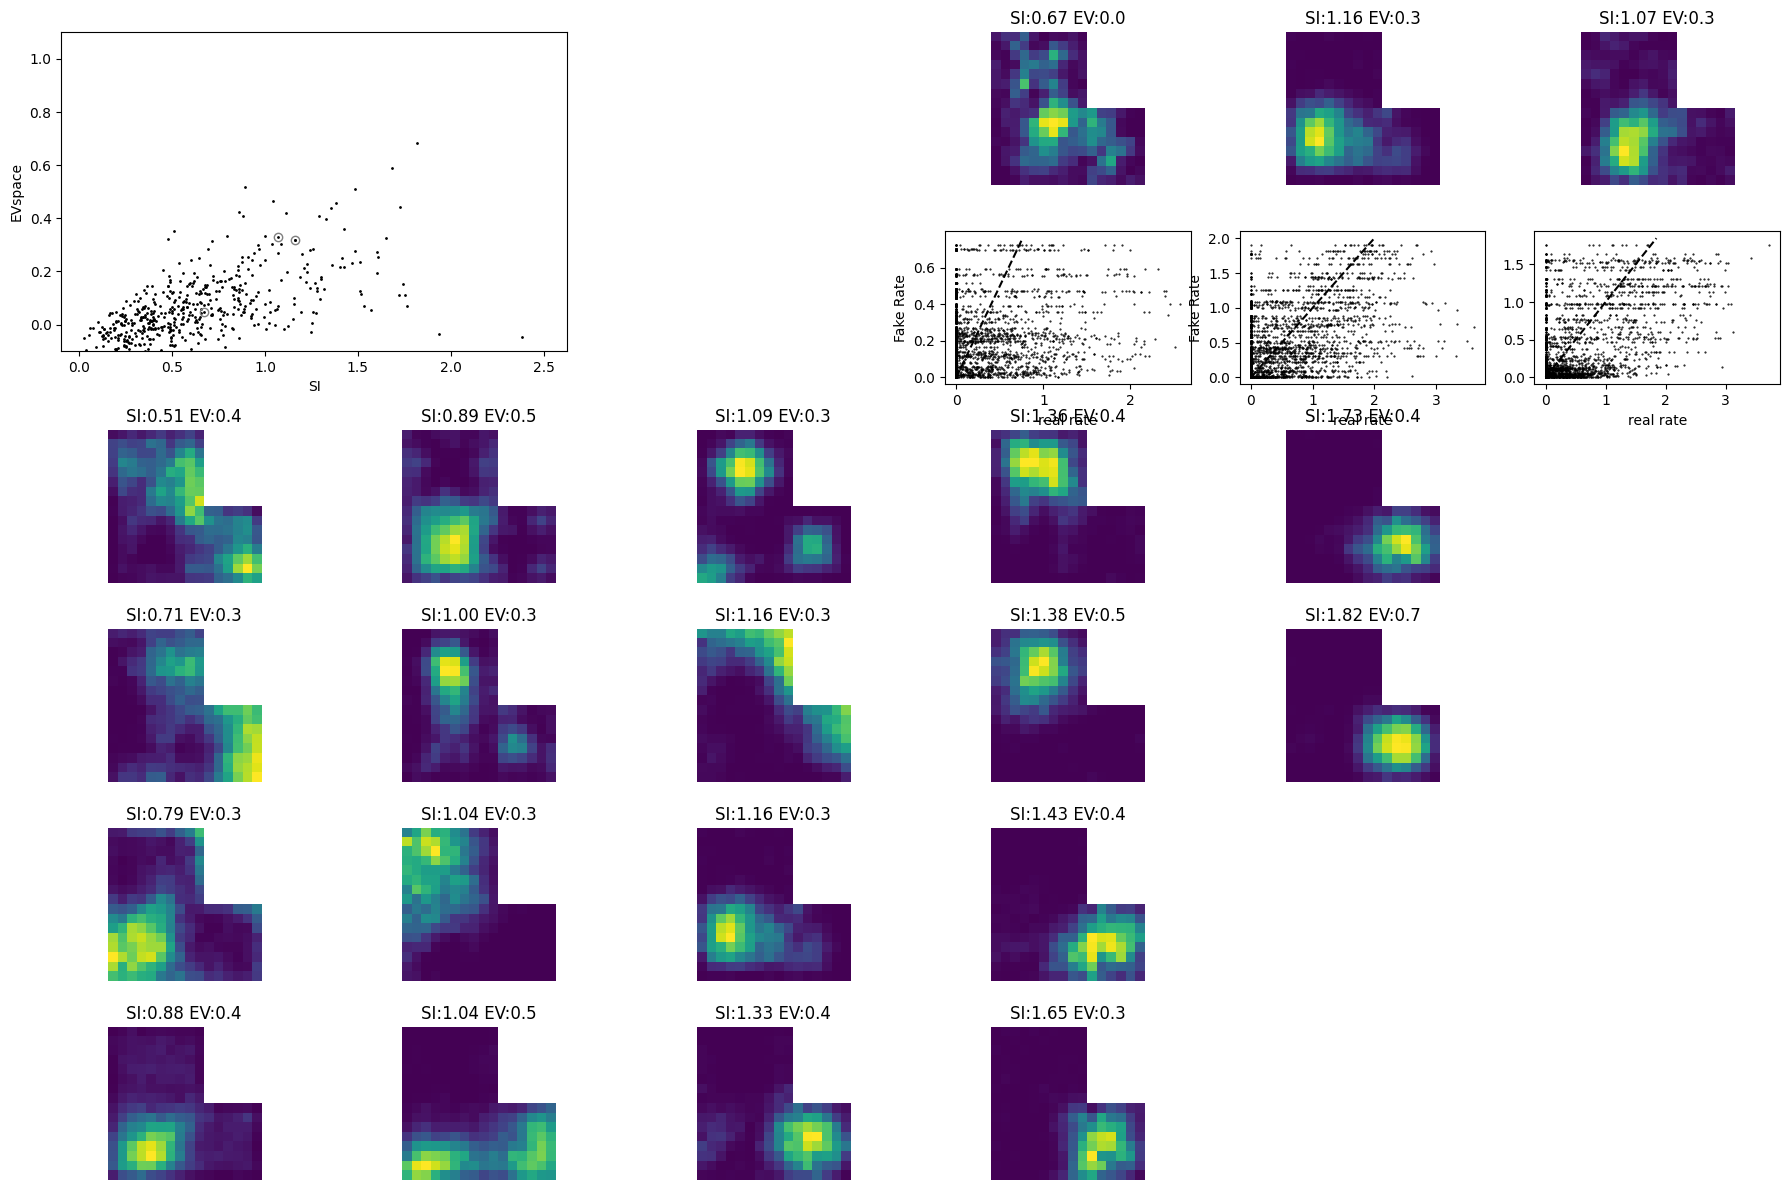

In [ ]:
# k=1 Visual
STA.TCReliabilityFigure(netname,savefolder, threshold=0.3)

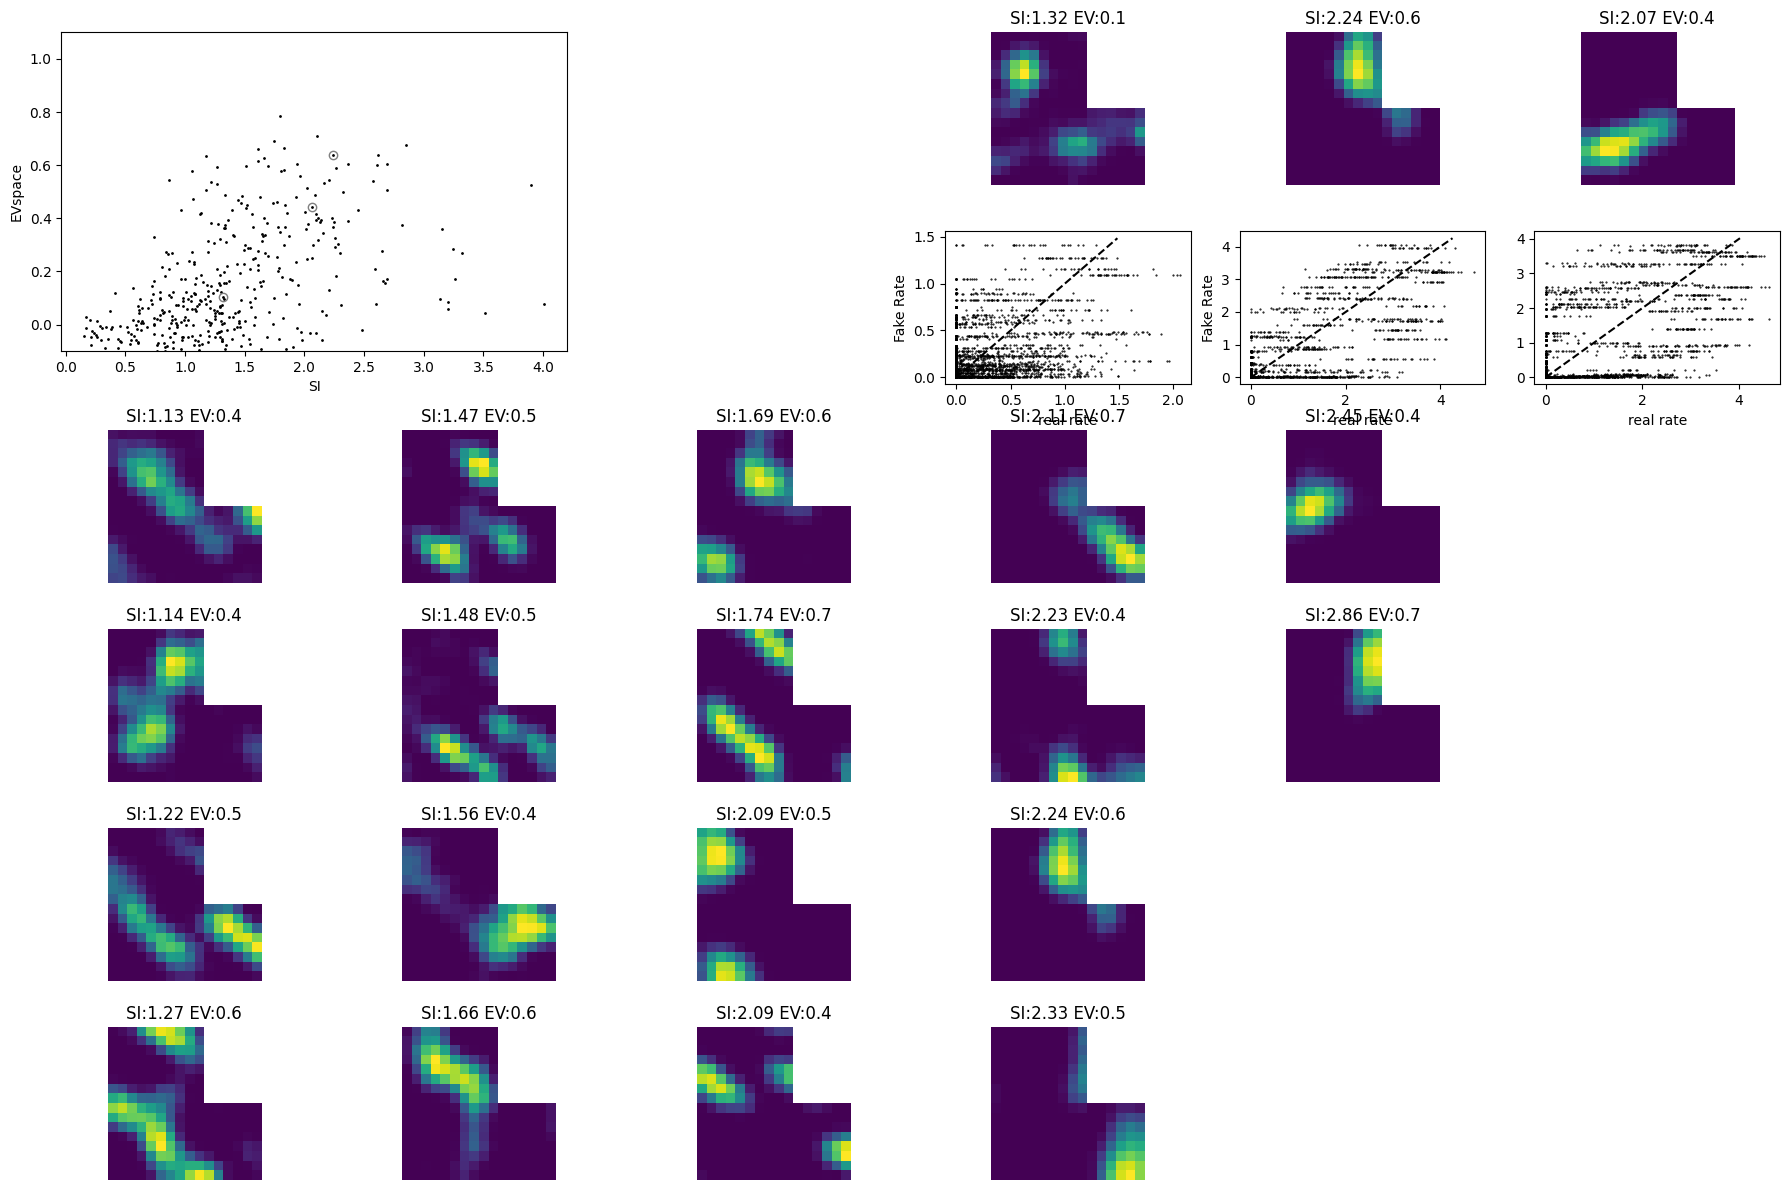

In [10]:
# k=5 Visual
STA.TCReliabilityFigure(netname,savefolder, threshold=0.4)

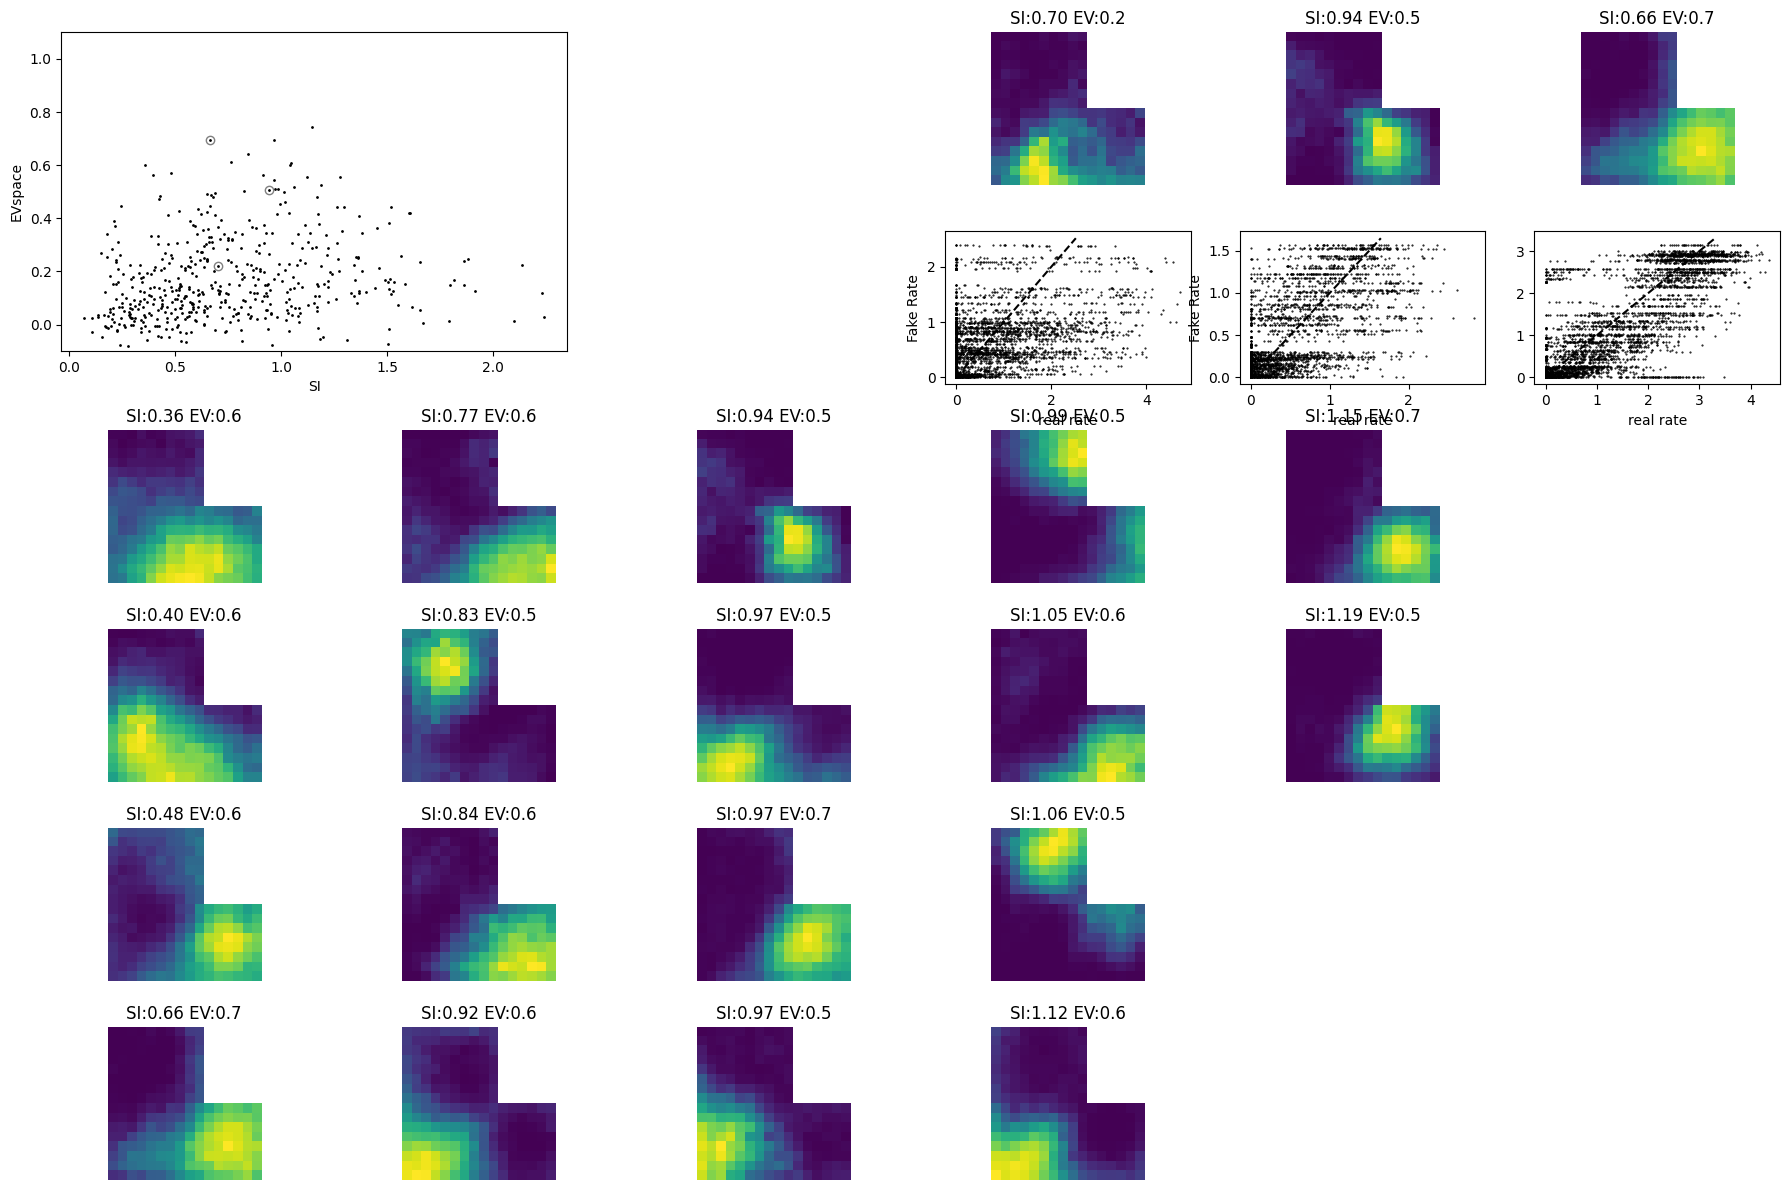

In [33]:
# Sparse Visual
STA.TCReliabilityFigure(netname,savefolder, threshold=0.5)

## Grid

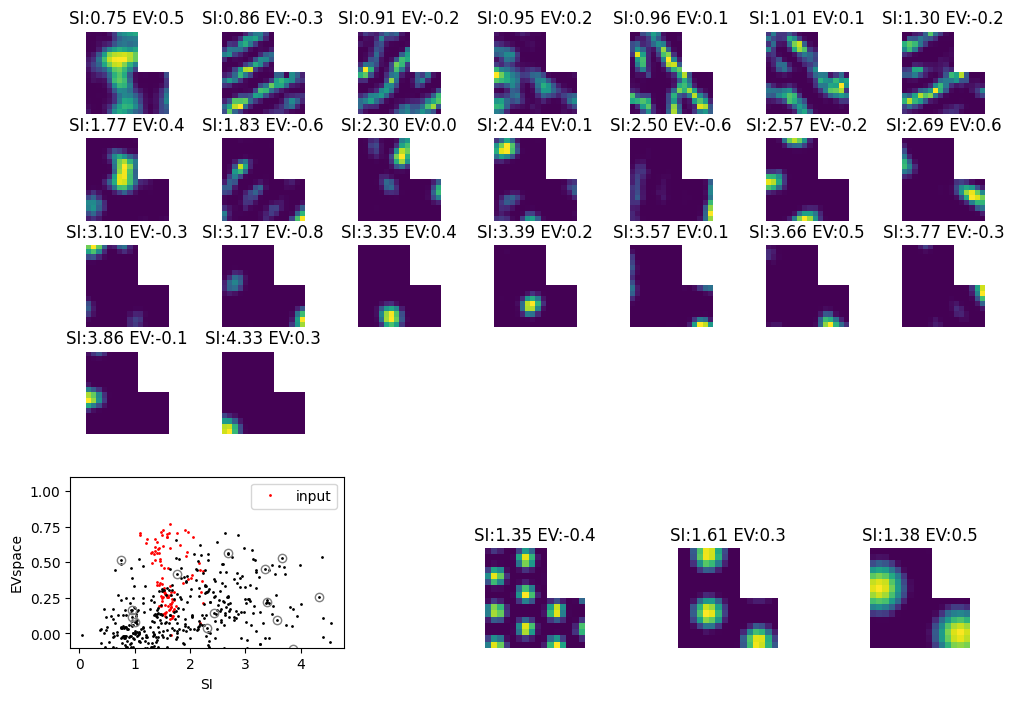

In [63]:
# NextStep Grid
STA.SpatialTuningFigure(netname=netname,savefolder=savefolder,
                       exgrid=5)

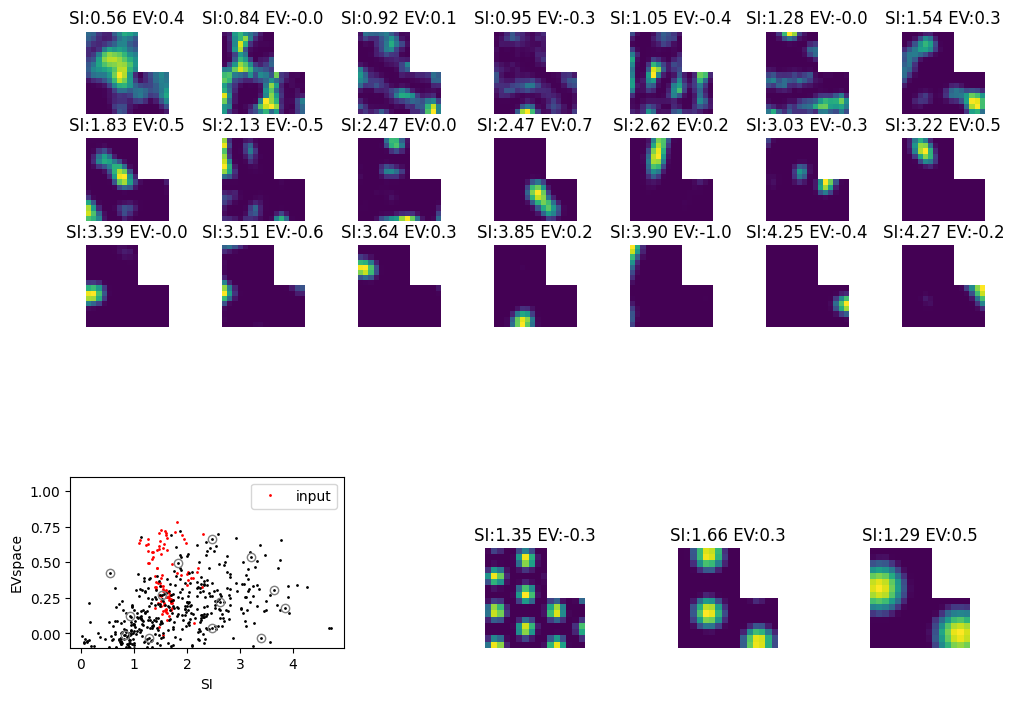

In [11]:
# k=1 Grid
STA.SpatialTuningFigure(netname=netname,savefolder=savefolder,
                       exgrid=5)

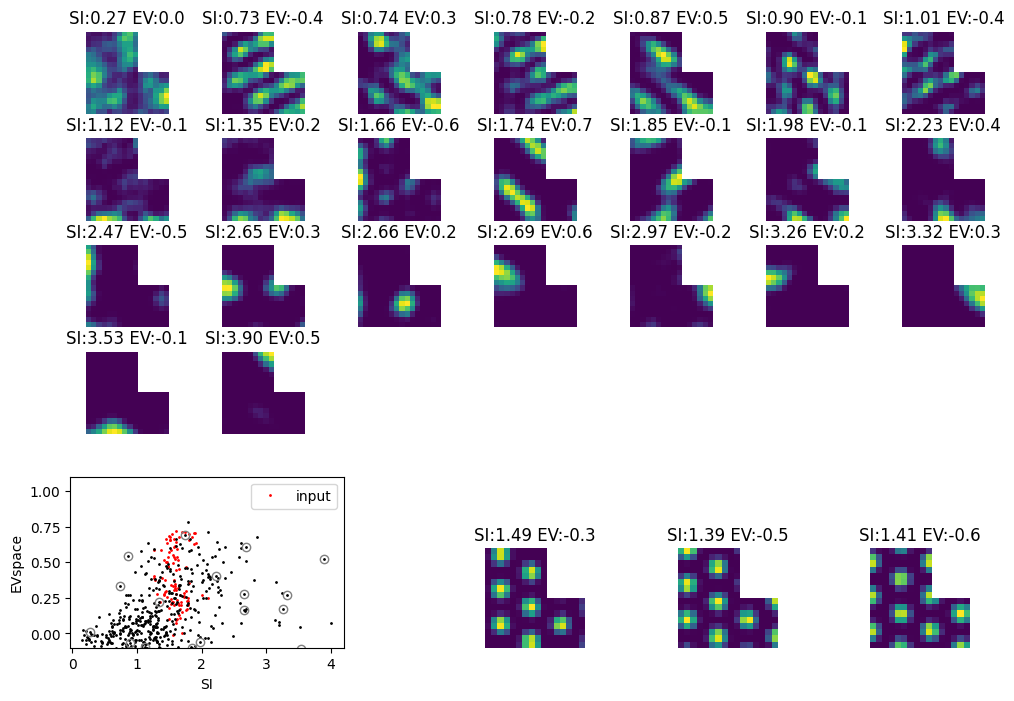

In [14]:
# k=5 Grid
STA.SpatialTuningFigure(netname=netname,savefolder=savefolder,
                       exgrid=5)

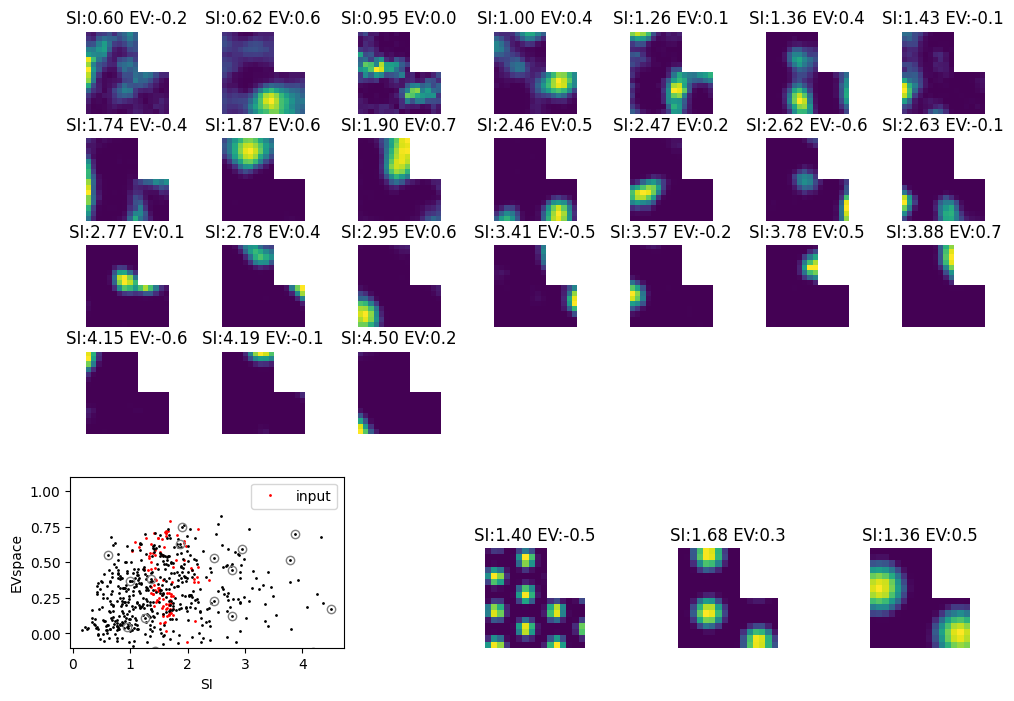

In [57]:
# Sparse Grid
STA.SpatialTuningFigure(netname=netname,savefolder=savefolder,
                       exgrid=5)

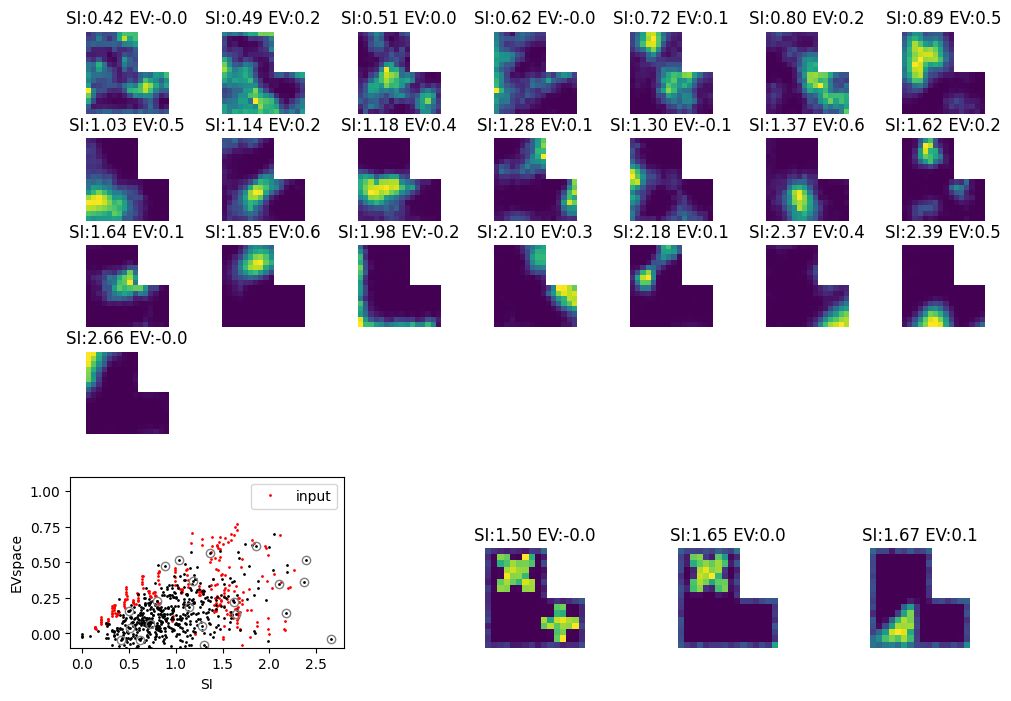

In [13]:
# k=5 Grid -> Visual
STA.SpatialTuningFigure(netname=netname,savefolder=savefolder,
                       exgrid=5)

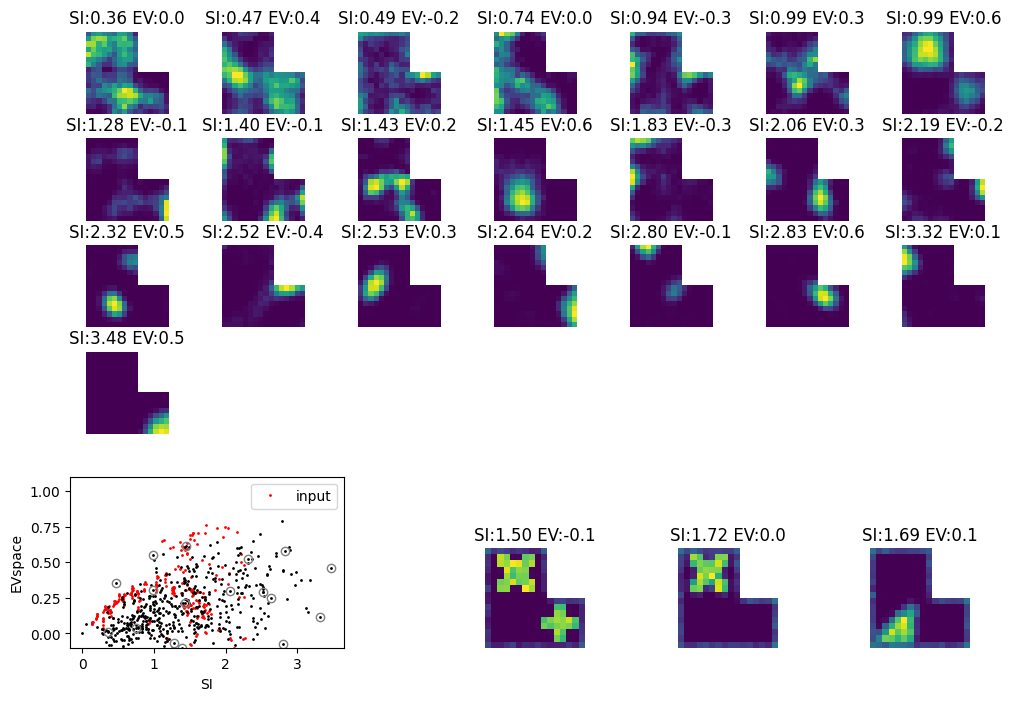

In [5]:
# k=5 Visual -> Grid
STA.SpatialTuningFigure(netname=netname,savefolder=savefolder,
                       exgrid=5)

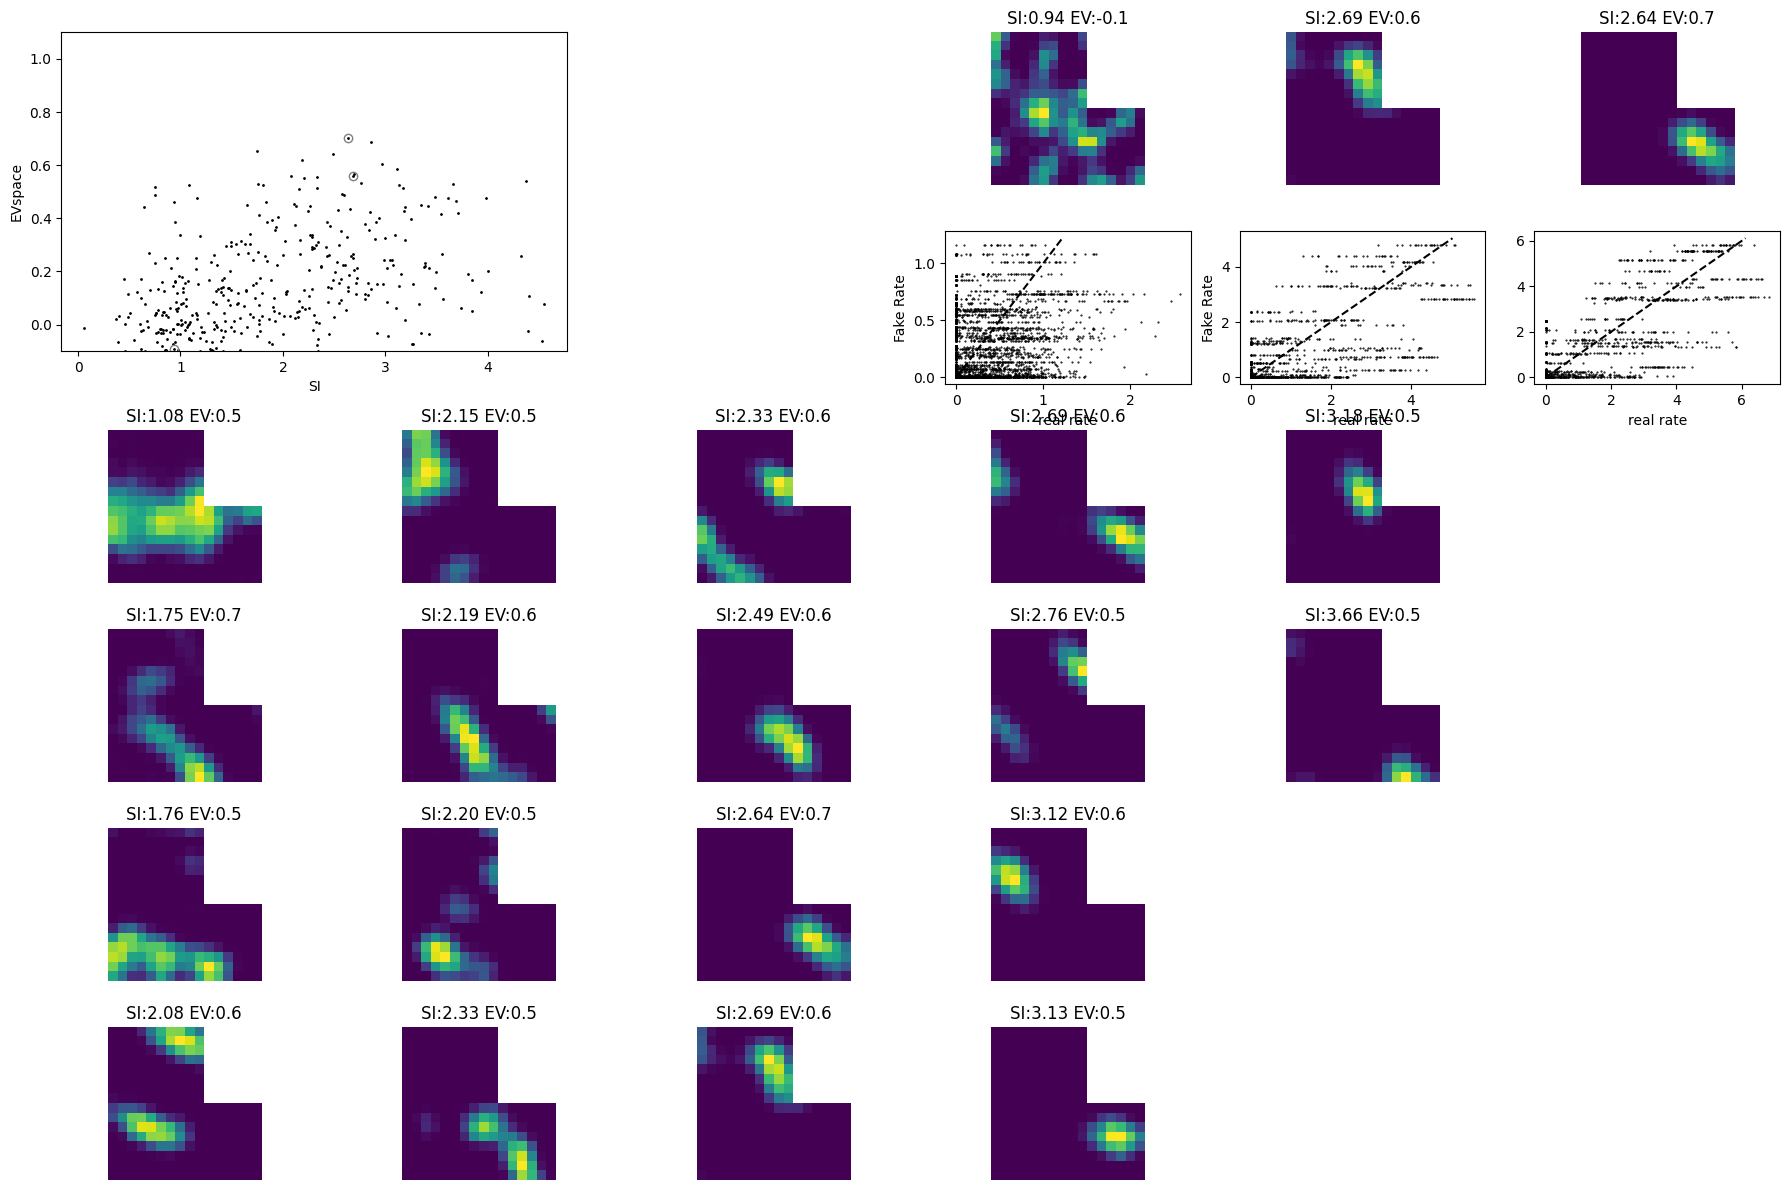

In [64]:
# NextStep Grid
STA.TCReliabilityFigure(netname,savefolder,
                        threshold=0.5
                        )

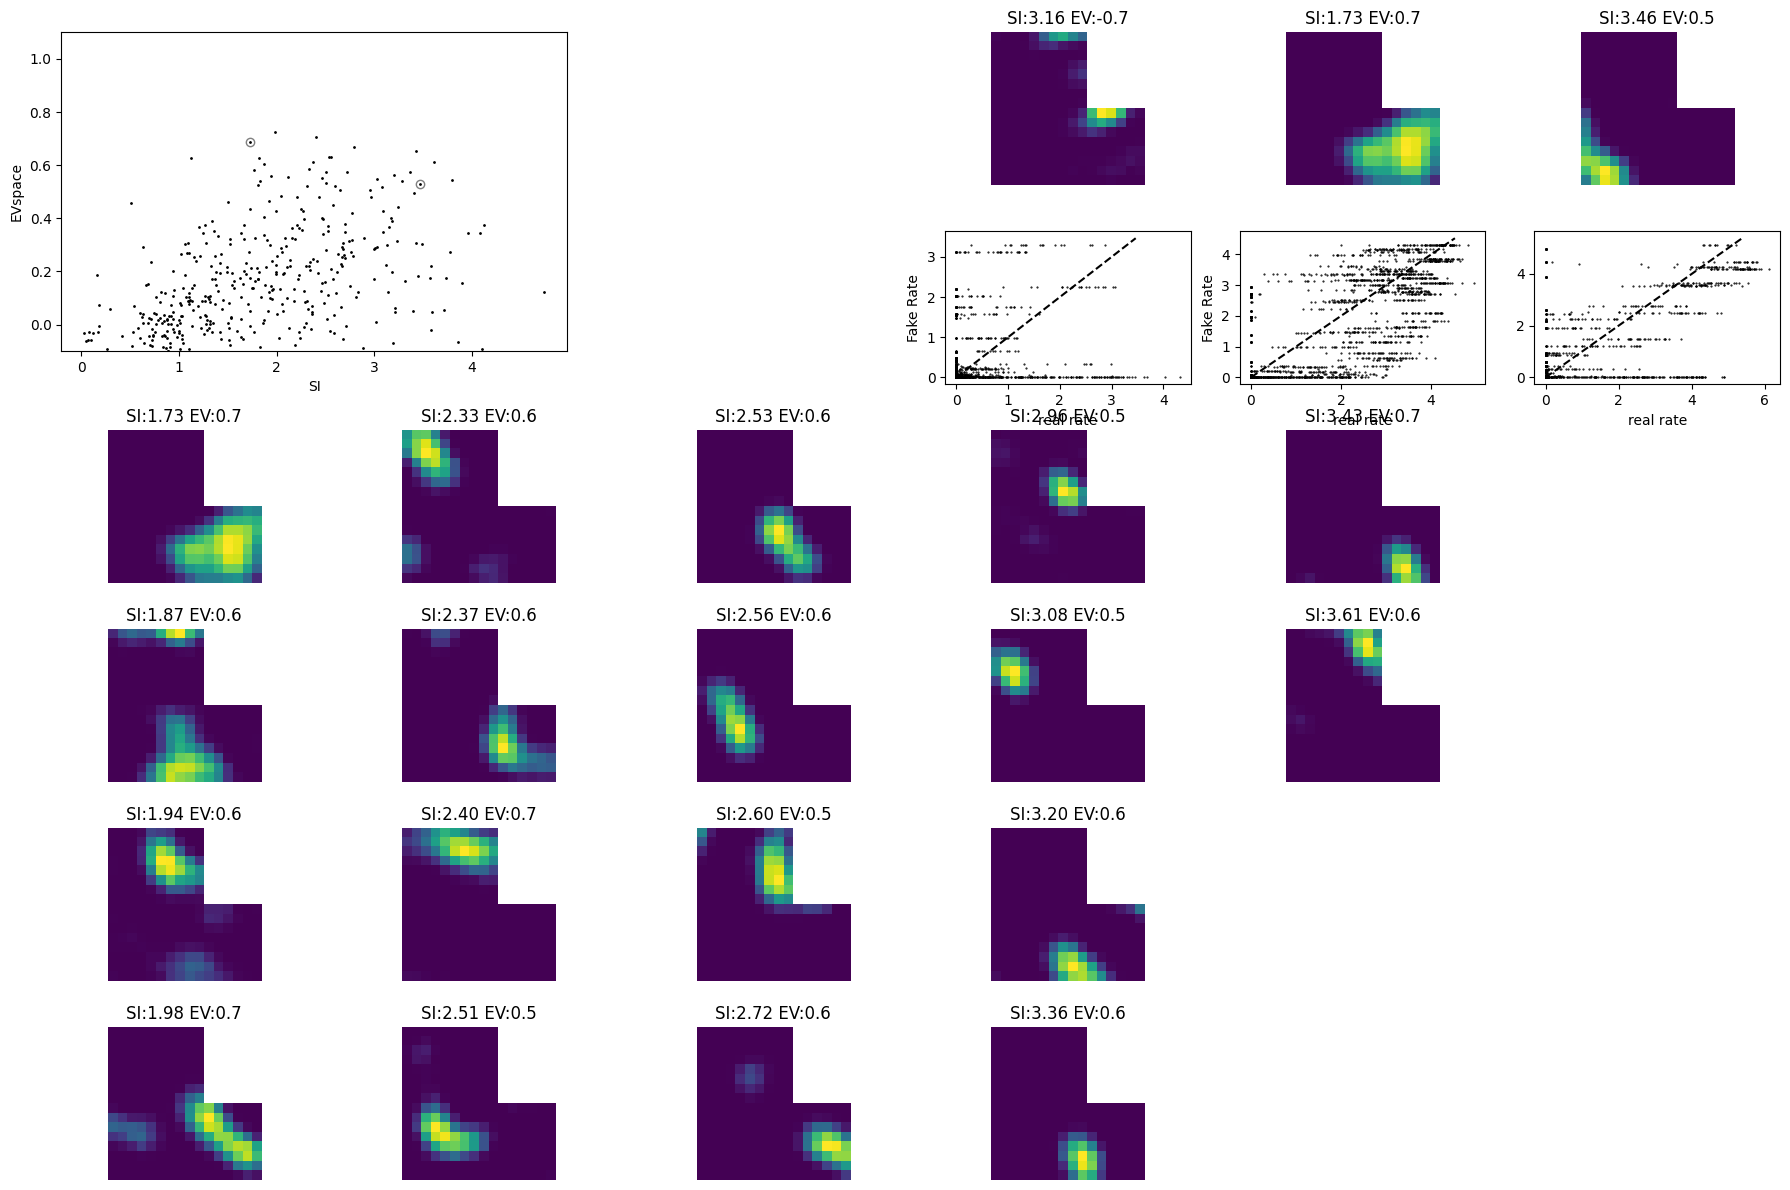

In [46]:
# k=1 Grid
STA.TCReliabilityFigure(netname,savefolder, threshold=0.5)

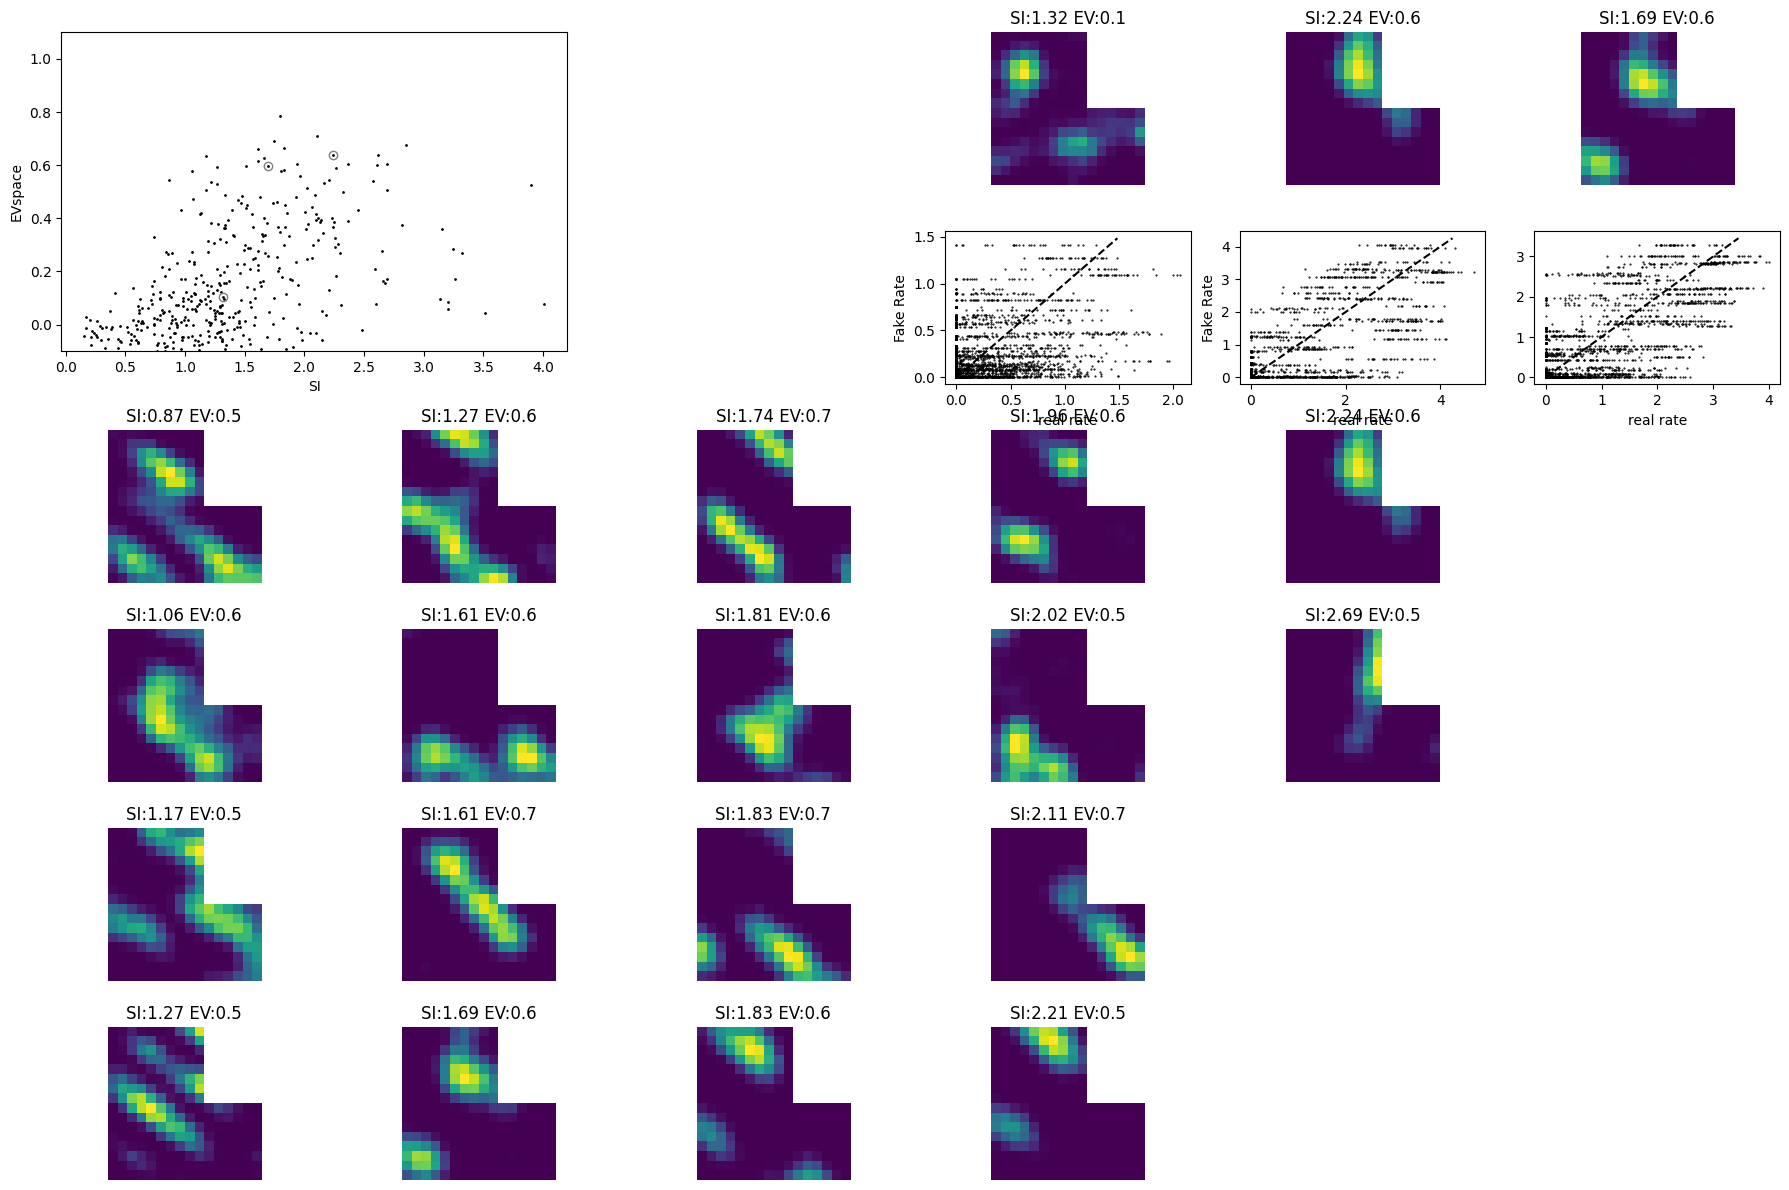

In [15]:
# k=5 Grid
STA.TCReliabilityFigure(netname,savefolder, threshold=0.5)

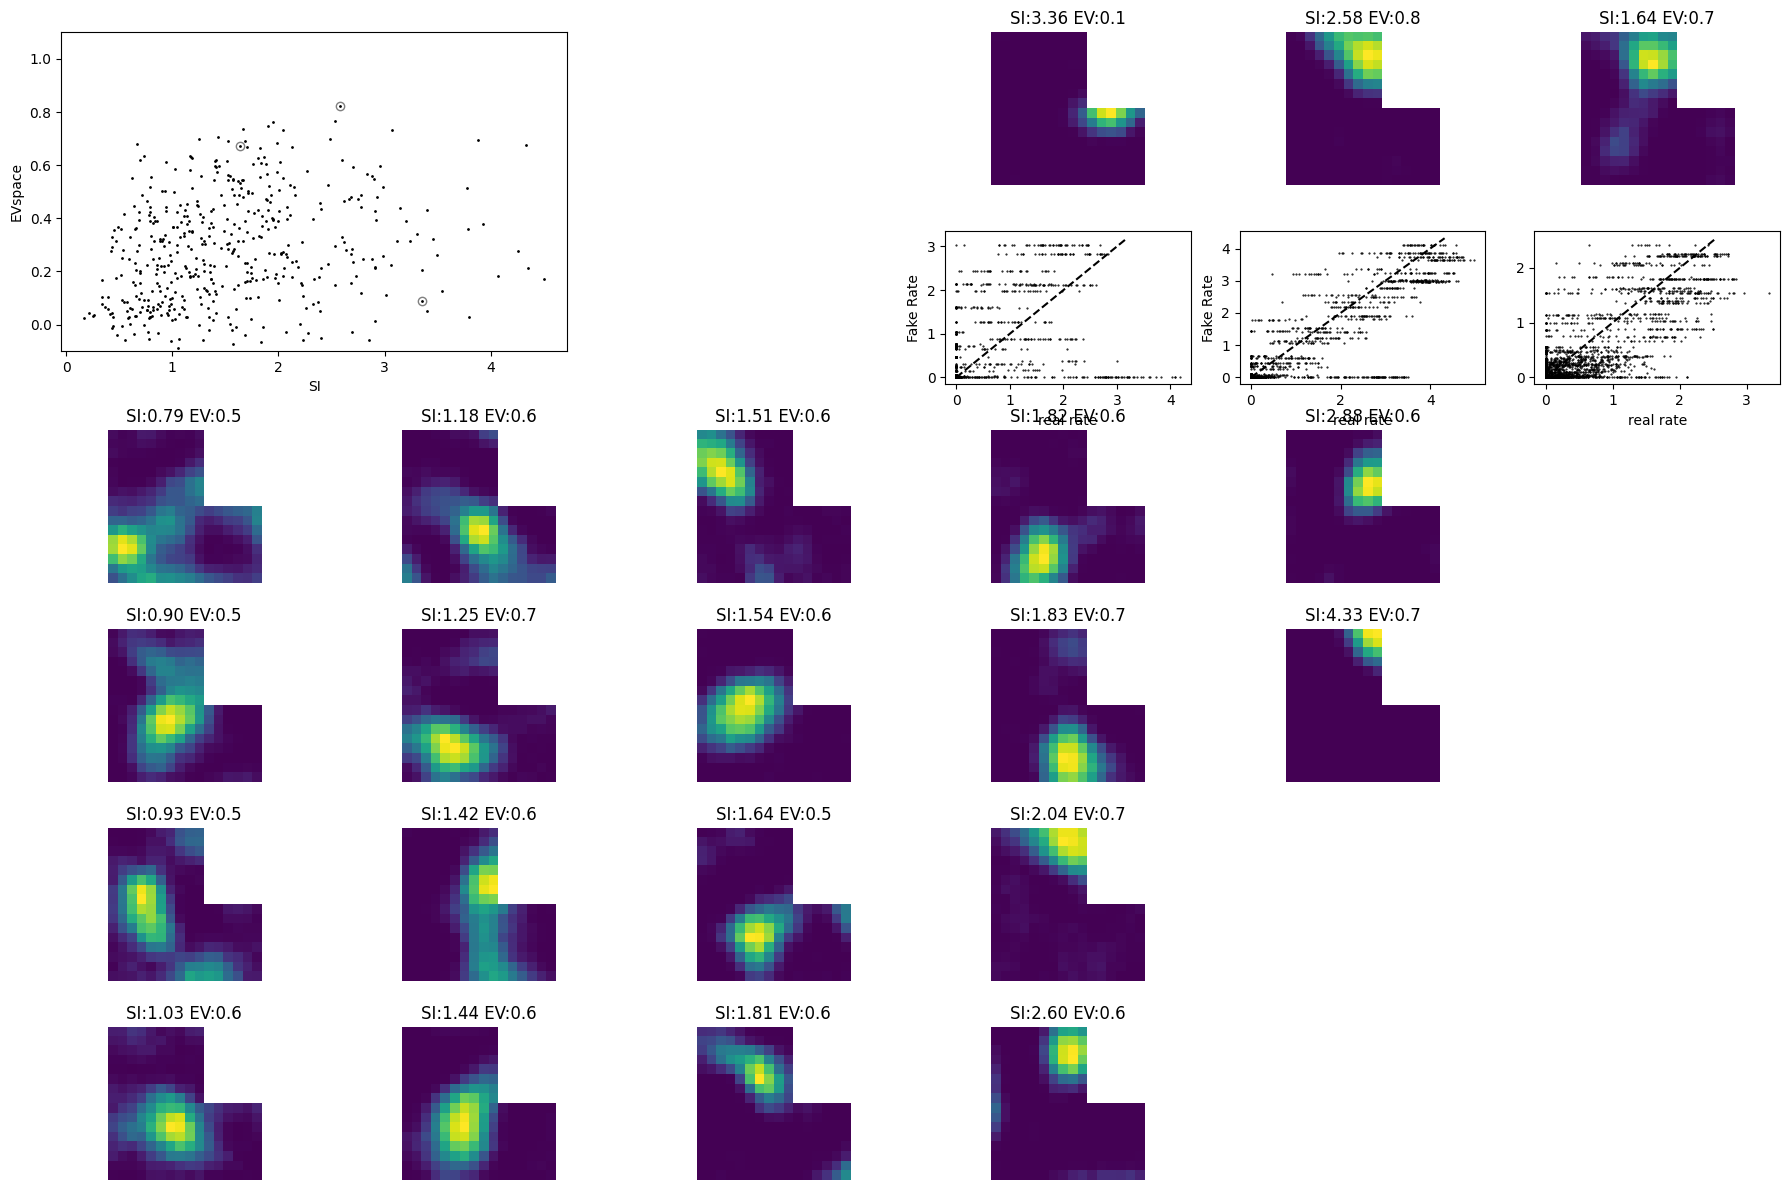

In [58]:
# Sparse Grid
STA.TCReliabilityFigure(netname,savefolder, threshold=0.5)

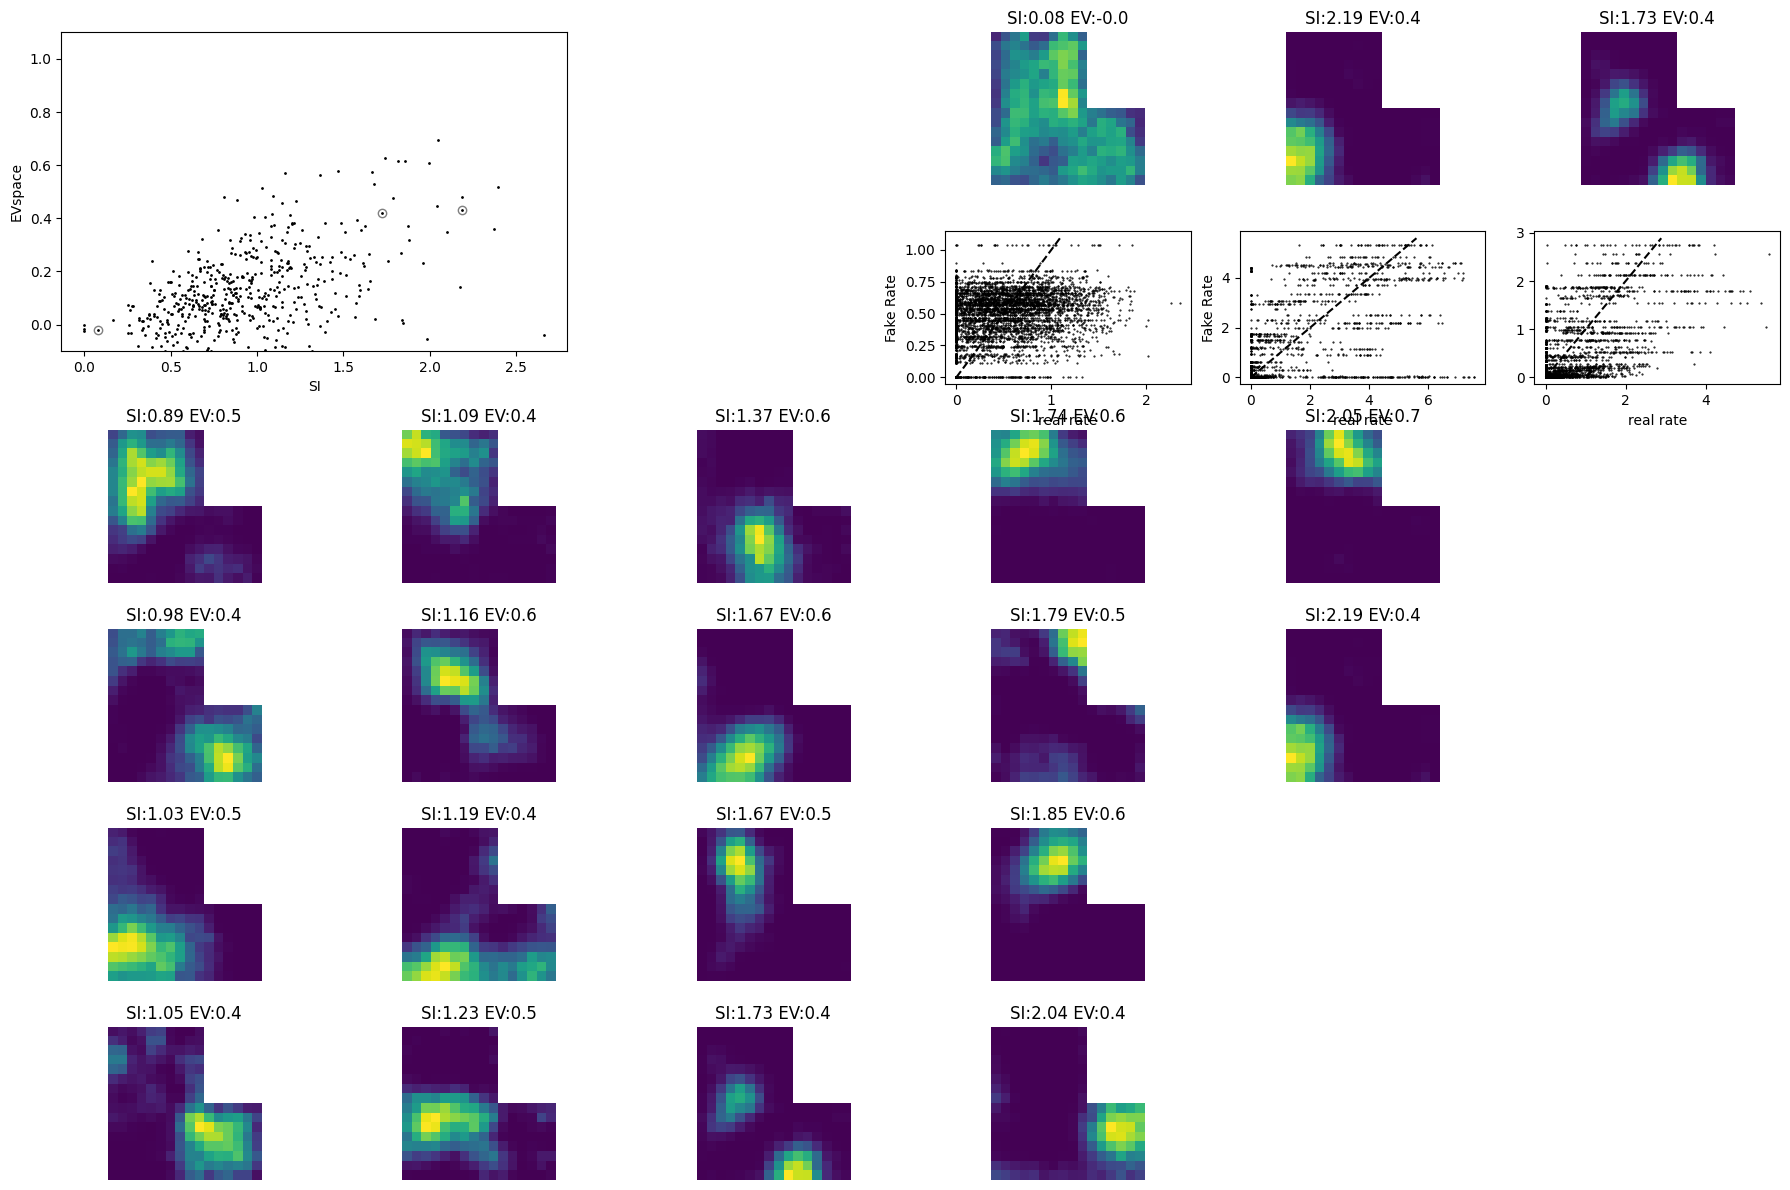

In [14]:
# k=5 Grid -> Visual
STA.TCReliabilityFigure(netname,savefolder, threshold=0.4)

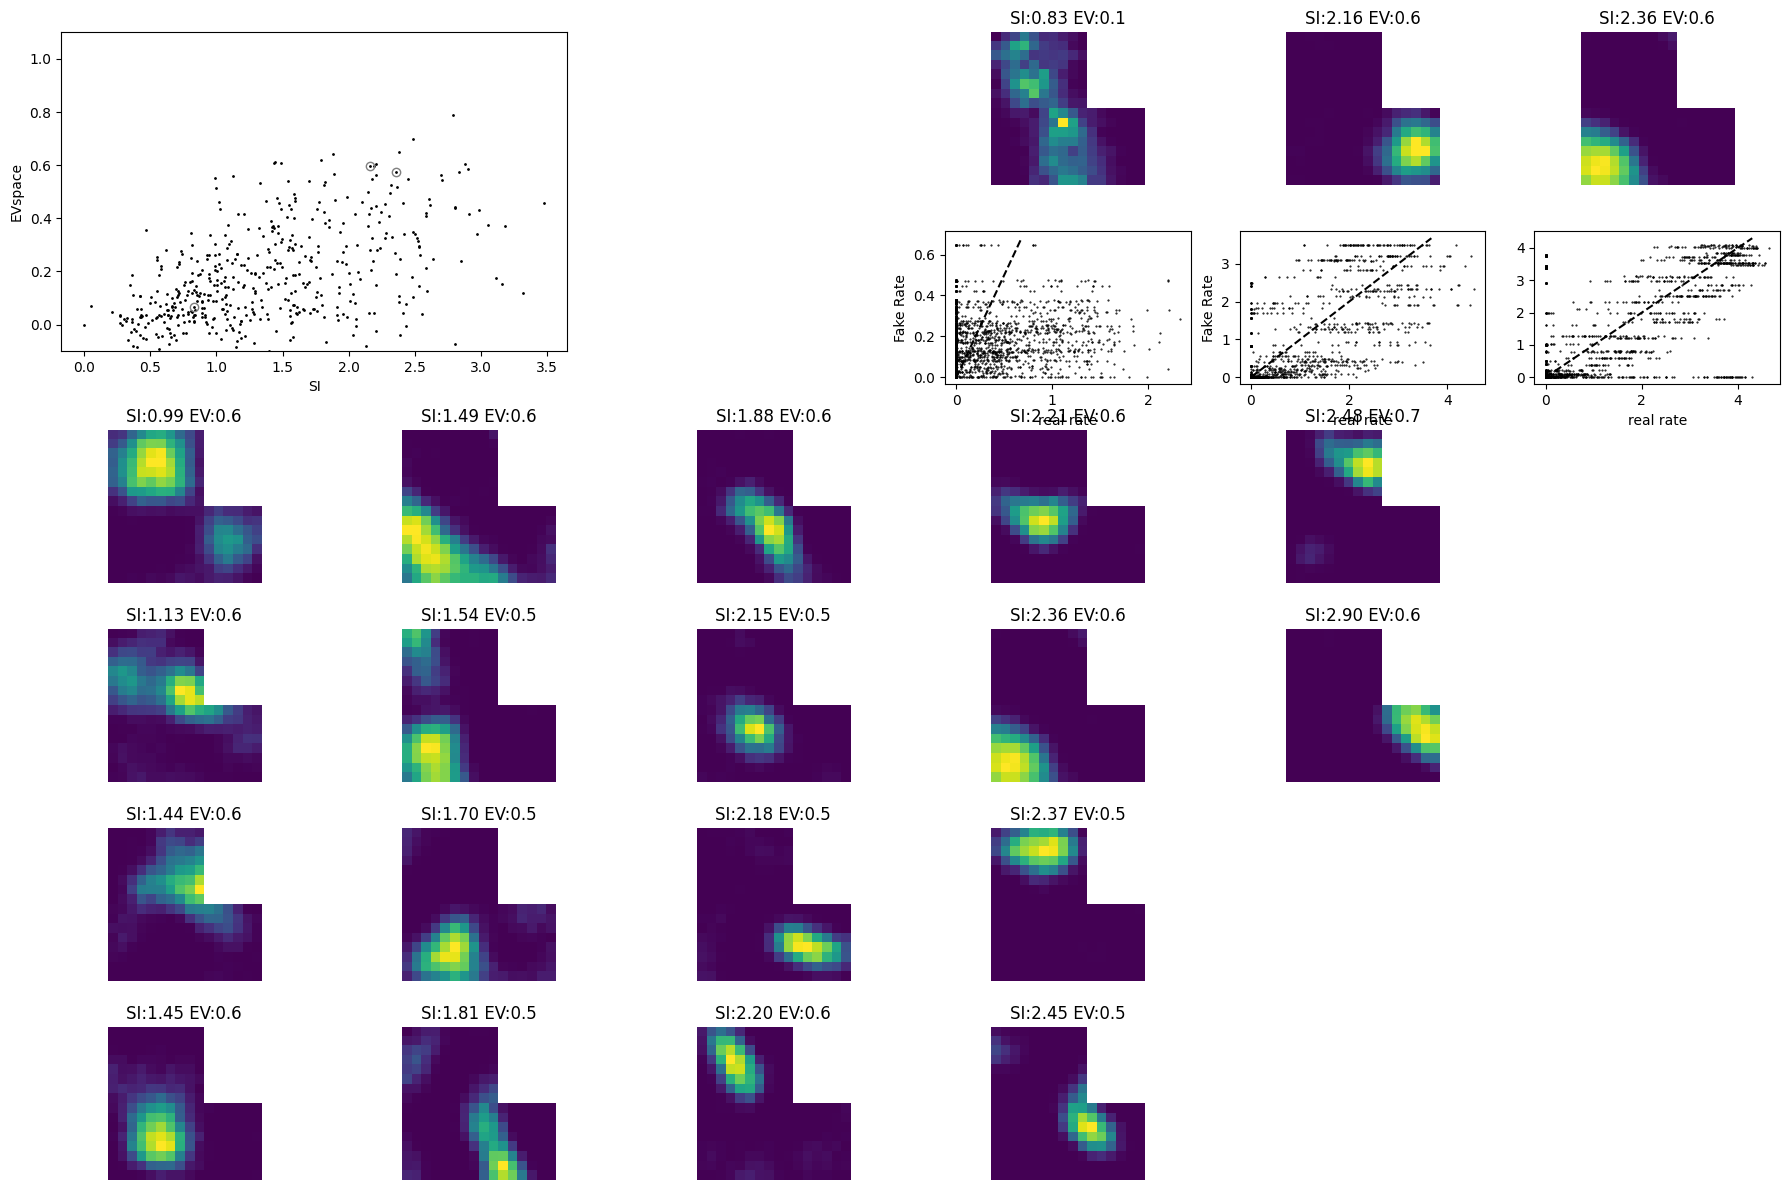

In [6]:
# k=5 Visual -> Grid
STA.TCReliabilityFigure(netname,savefolder, threshold=0.5)

In [16]:
RGA = representationalGeometryAnalysis(predictiveNet,
                                       timesteps_wake=20000,
                                       noisemag = 0,
                                       noisestd=0.05,
                                       withIsomap=True,
                                       actRSA = False,
                                       obsRSA=False,
                                       HDRSA = False,
                                       agent=agent,
                                       n_neighbors=50,
                                       fig_type='pdf',)

Running WAKE
Running SLEEP
Fitting Isomap


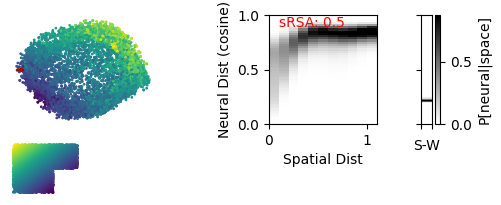

In [ ]:
# NextStep Visual
RGA.WakeSleepFigure(netname,savefolder,
                    withSleep=False
                    )

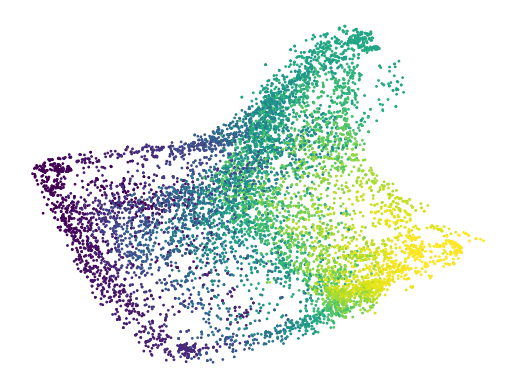

In [19]:
from prnn.utils.general import saveFig

plt.figure()
RGA.isomapPanel('position')
saveFig(plt.gcf(), 'isomap_'+netname, savefolder,
                    filetype='pdf')

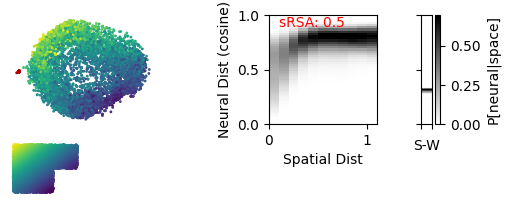

In [22]:
# k=1 Visual
RGA.WakeSleepFigure(netname,savefolder)

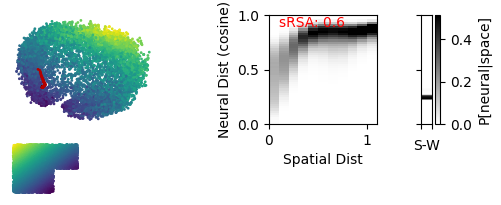

In [29]:
# k=5 Visual
RGA.WakeSleepFigure(netname,savefolder)

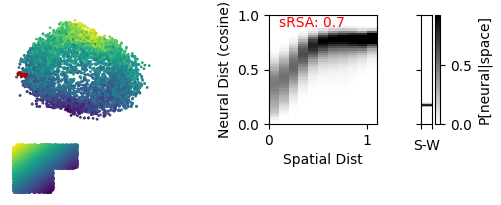

In [35]:
# Sparse Visual
RGA.WakeSleepFigure(netname,savefolder)

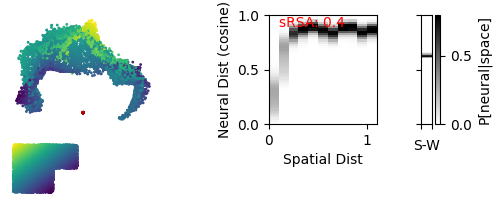

In [41]:
# NextStep Grid
RGA.WakeSleepFigure(netname,savefolder,
                    # withSleep=False
                    )

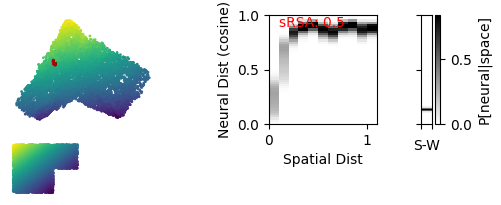

In [48]:
# k=1 Grid
RGA.WakeSleepFigure(netname,savefolder)

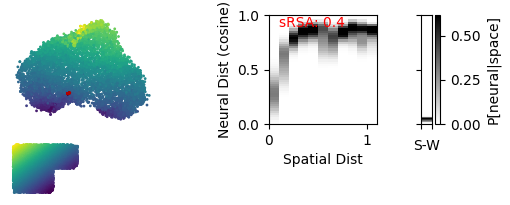

In [17]:
# k=5 Grid
RGA.WakeSleepFigure(netname,savefolder)

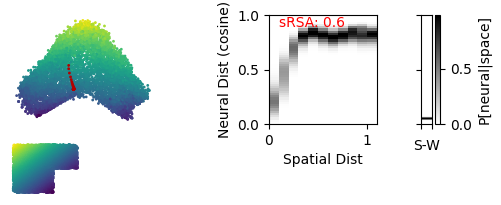

In [60]:
# Sparse Grid
RGA.WakeSleepFigure(netname,savefolder)

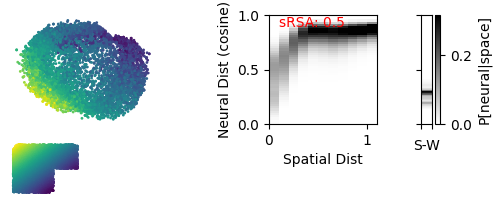

In [14]:
# k=5 Grid -> Visual
RGA.WakeSleepFigure(netname,savefolder,
                    withSleep=False
                    )

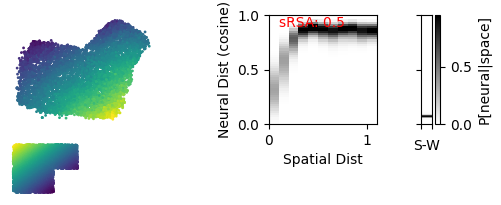

In [17]:
# k=5 Visual -> Grid
RGA.WakeSleepFigure(netname,savefolder,
                    withSleep=False
                    )